In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind

sns.set_style("darkgrid")
sns.set_palette("Paired")

# Load stock data

In [ ]:
stocks = pd.read_csv('/content/data_stocks.csv')
stocks.index = pd.to_datetime(stocks["Date"],dayfirst=False,utc=True)
stocks.drop('Date',axis=1,inplace=True)
stocks

,NIKE Close,LENOVO Close
Date,,
2013-01-02 05:00:00+00:00,22.631634,11.405155
2013-01-03 05:00:00+00:00,22.863016,11.405155
2013-01-04 05:00:00+00:00,23.085672,11.763082
2013-01-07 05:00:00+00:00,23.120592,11.672085
2013-01-08 05:00:00+00:00,22.876118,11.659951
...,...,...
2023-12-22 05:00:00+00:00,106.760101,25.713736
2023-12-26 05:00:00+00:00,106.740326,25.820553
2023-12-27 05:00:00+00:00,105.860870,26.597403


In [ ]:
# stocks_nke_hist = stocks[["NIKE Close"]].copy()
# stocks_nke_hist["year"] = [str(x.year) for x in stocks_nke_hist.index]
# stocks_nke_hist
# sns.histplot(stocks_nke_hist,element="poly",hue="year")
# # plt.grid()
# # plt.show()


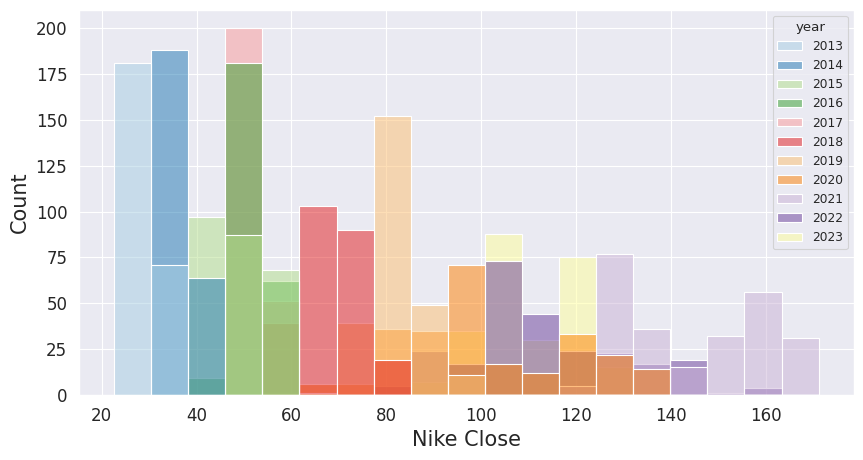

In [ ]:
stocks_nke_hist = stocks.copy()
stocks_nke_hist["year"] = [str(x.year) for x in stocks_nke_hist.index]
stocks_nke_hist["month"] = [str(x.month) for x in stocks_nke_hist.index]

plt.figure(figsize=(10,5))
sns.histplot(data=stocks_nke_hist,x="NIKE Close",hue="year")#,multiple="dodge",element="poly")
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Nike Close",size=15)
plt.ylabel("Count",size=15)
plt.savefig('/content/nike_hist.png',dpi=1200)
plt.show()


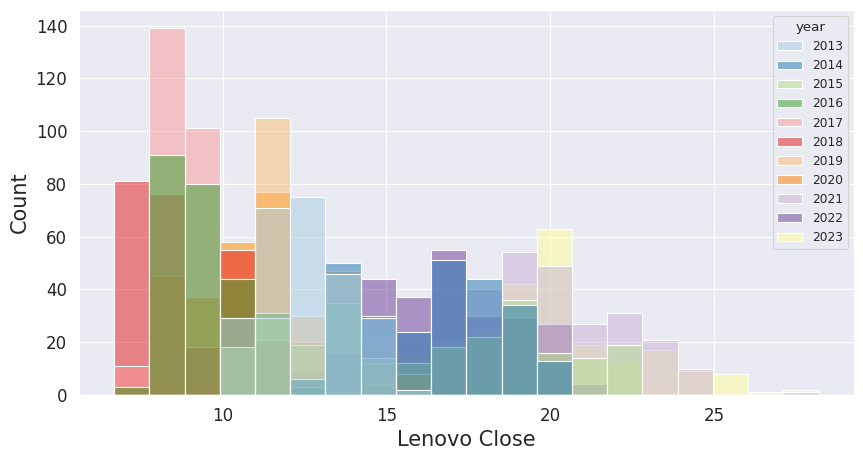

In [ ]:
stocks_lenovo_hist = stocks.copy()
stocks_lenovo_hist["year"] = [str(x.year) for x in stocks_lenovo_hist.index]
stocks_lenovo_hist["month"] = [str(x.month) for x in stocks_lenovo_hist.index]

plt.figure(figsize=(10,5))
sns.histplot(data=stocks_lenovo_hist,x="LENOVO Close",hue="year")#,multiple="dodge",element="poly")
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Lenovo Close",size=15)
plt.ylabel("Count",size=15)
plt.savefig('/content/lenovo_hist.png',dpi=1200)
plt.show()


In [ ]:
for k in stocks:
#perform Shapiro-Wilk test
  print(k,(shapiro(stocks[k])))
#p-val>0.05 ->normal

NIKE Close ShapiroResult(statistic=0.9376891879592592, pvalue=1.341797732195218e-32)
LENOVO Close ShapiroResult(statistic=0.9421438296993482, pvalue=1.2810083728272357e-31)


In [ ]:
stocks_nke = stocks["NIKE Close"].resample('YE').median()
stocks_lnv = stocks["LENOVO Close"].resample('YE').median()

# Load Key Nike finantial ratios

In [ ]:
from scipy.stats import linregress

from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import statsmodels.api as sm


In [ ]:
nike_kfr = pd.read_csv('/content/kfr_nike_clean.csv',index_col=0)
nike_kfr

,Current Ratio,Long-term Debt \ Capital,DebMEquity Ratio,Net Profit Margin,ROE - Return on Equity,ROA - Retum On Assets
Year,,,,,,
2023,2.3961,0.3539,0.6174,11.0977,39.5010,14.9567
2022,2.7228,0.3893,0.6379,9.8991,36.2039,13.5088
2021,2.6294,0.3686,0.6171,12.9437,39.5655,14.9947
2020,2.7177,0.4244,0.7374,12.8587,44.8578,15.1749
2019,2.4814,0.5387,1.1989,6.7882,31.5208,8.1010
2018,2.1008,0.2770,0.3848,10.2999,44.5686,16.9878
2017,2.5056,0.2611,0.3883,5.3109,19.7004,8.5774
2016,2.9341,0.2186,0.3064,12.3435,34.1733,18.2295
2015,2.8042,0.1398,0.1663,11.6135,30.6739,17.5874


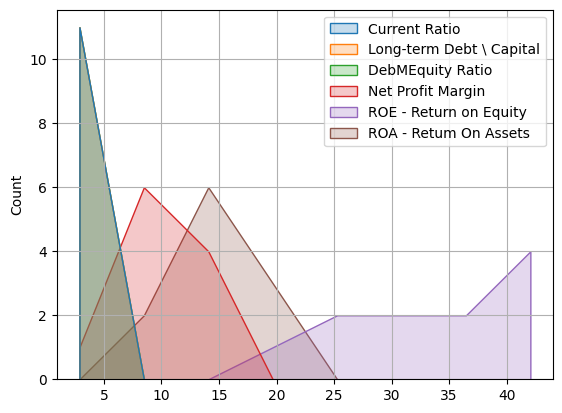

In [ ]:
sns.histplot(nike_kfr,element="poly")
plt.grid()
plt.show()

In [ ]:
for k in nike_kfr:
#perform Shapiro-Wilk test
  print(k,np.round(shapiro(nike_kfr[k]),5))
#p-val>0.05 ->normal

Current Ratio [0.95285 0.68051]
Long-term Debt \ Capital [0.96549 0.83774]
DebMEquity Ratio [0.91522 0.28082]
Net Profit Margin [0.89118 0.14388]
ROE - Return on Equity [0.96048 0.77761]
ROA - Retum On Assets [0.84829 0.04054]


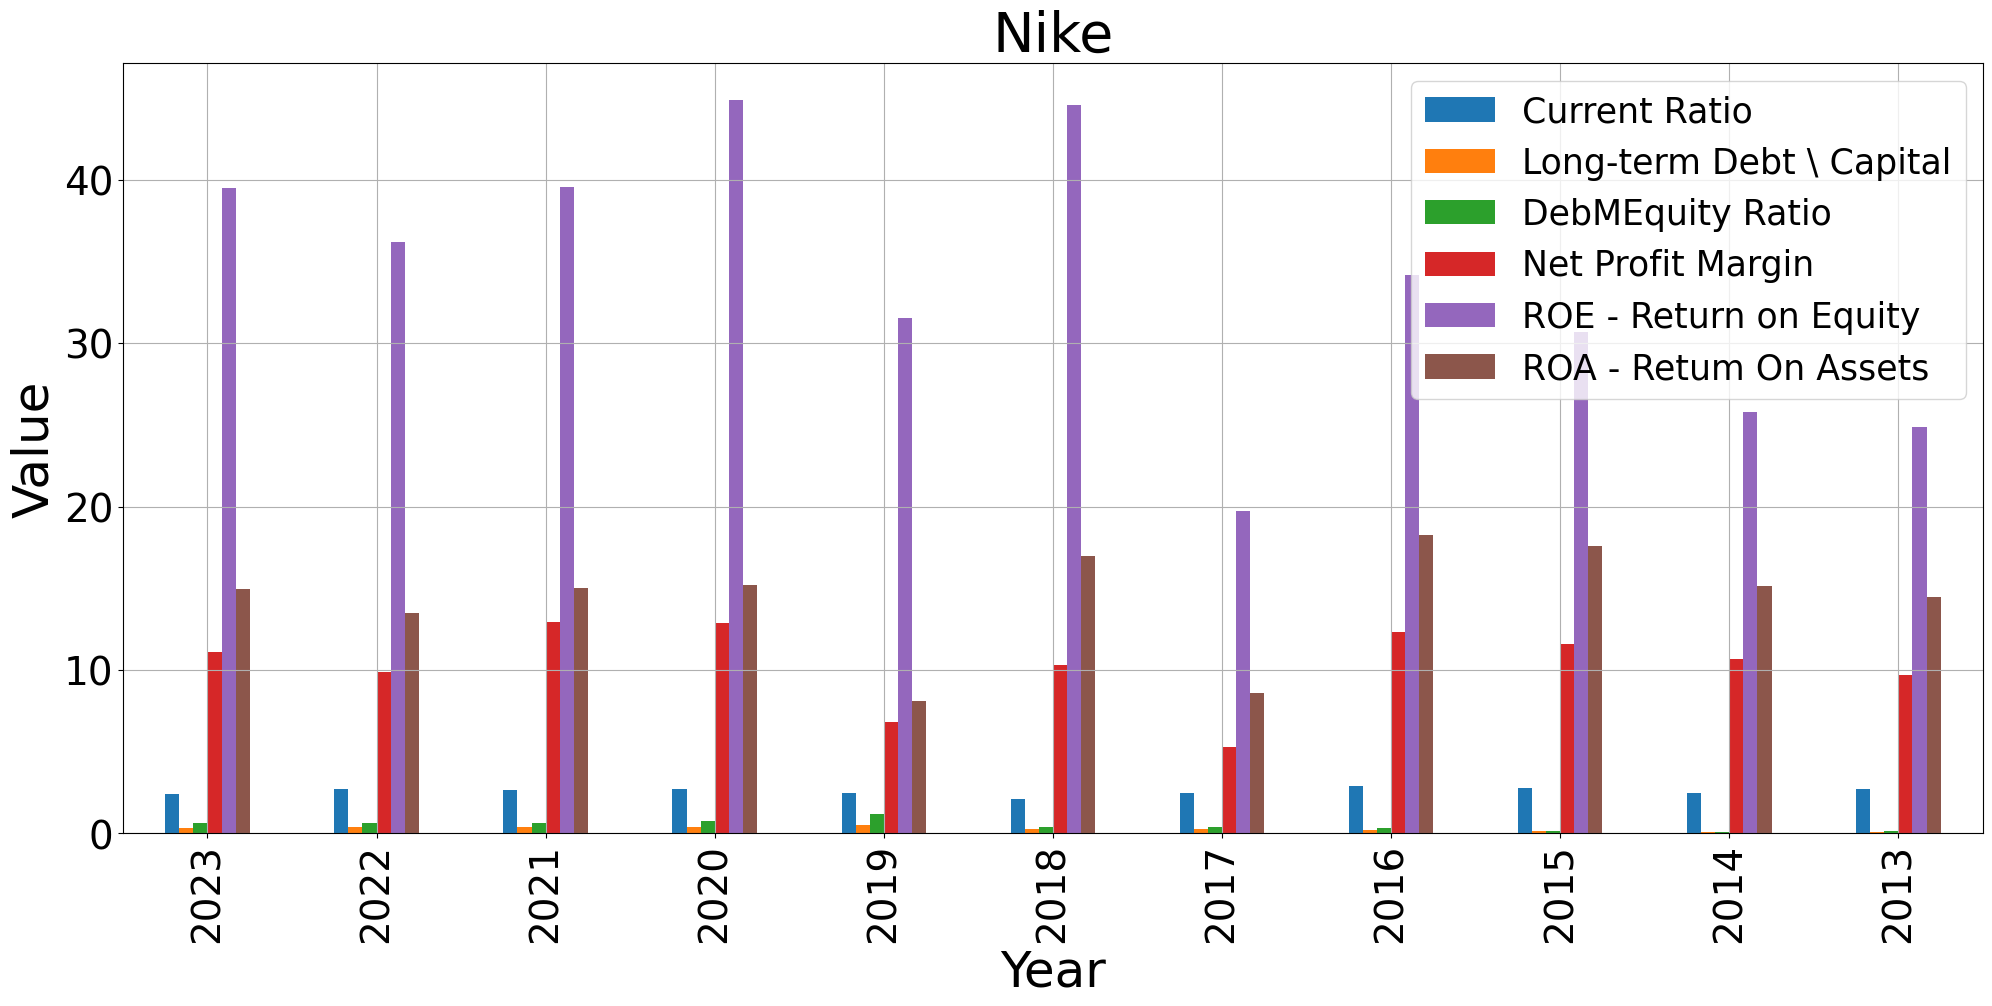

In [ ]:
nike_kfr.plot(kind="bar",grid=True,figsize=(24,10))
plt.title('Nike',size=20*2)
plt.ylabel('Value',size=18*2)
plt.xlabel('Year',size=18*2)
plt.xticks(size=14*2)
plt.yticks(size=14*2)
plt.legend(fontsize=25)
plt.savefig('/content/results/plots/plots_nike/nike_barplot.png',dpi=1500)
plt.show()

In [ ]:
def linreg(a,x,b):
      return((a*x)+b)

In [ ]:
len(stocks_nke.values),len(nike_kfr[k].values)

(11, 11)

[ 51.34366781 -58.46688636] r = 0.33 R2=0.11


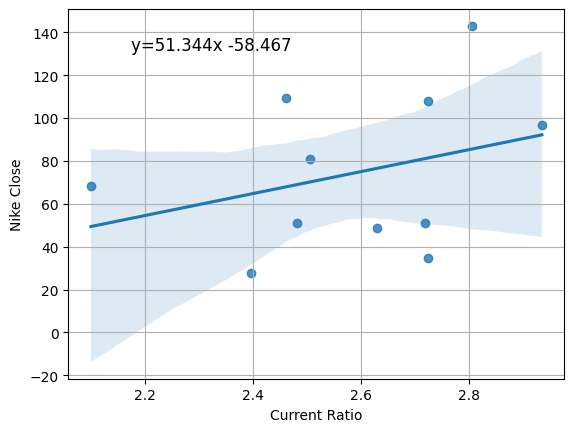

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.073
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.327
Time:                        22:56:38   Log-Likelihood:                -53.953
No. Observations:                  11   AIC:                             111.9
Df Residuals:                       9   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -58.4669    128.805     -0.454      0.6

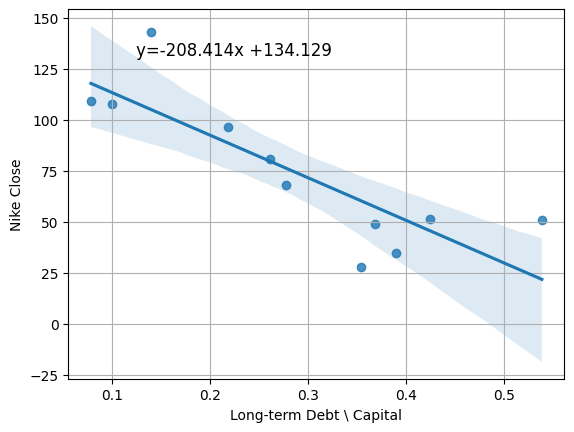

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     20.38
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00146
Time:                        22:56:41   Log-Likelihood:                -48.066
No. Observations:                  11   AIC:                             100.1
Df Residuals:                       9   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.1289     14.675      9.140      0.0

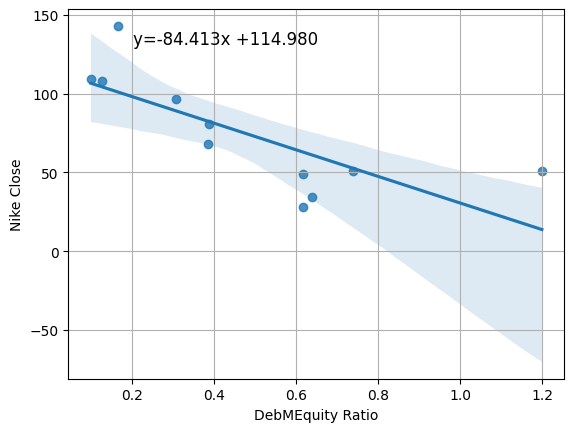

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     12.24
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00674
Time:                        22:56:46   Log-Likelihood:                -49.849
No. Observations:                  11   AIC:                             103.7
Df Residuals:                       9   BIC:                             104.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9804     13.795      8.335      0.0

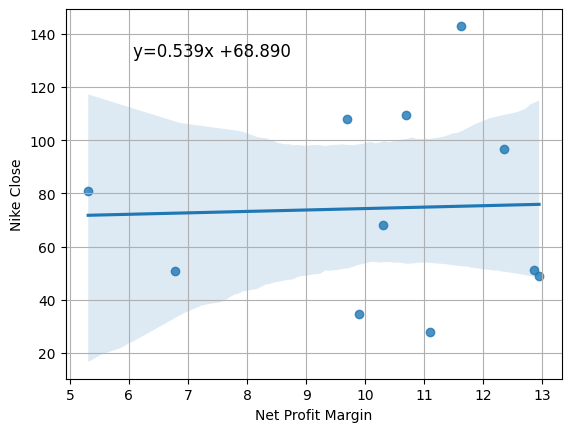

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                   0.01159
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.917
Time:                        22:56:50   Log-Likelihood:                -54.565
No. Observations:                  11   AIC:                             113.1
Df Residuals:                       9   BIC:                             113.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8901     52.993      1.300      0.2

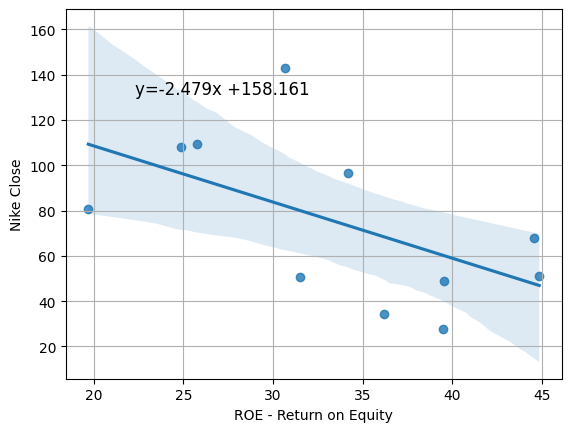

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     4.096
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0737
Time:                        22:56:56   Log-Likelihood:                -52.509
No. Observations:                  11   AIC:                             109.0
Df Residuals:                       9   BIC:                             109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.1611     42.446      3.726      0.0

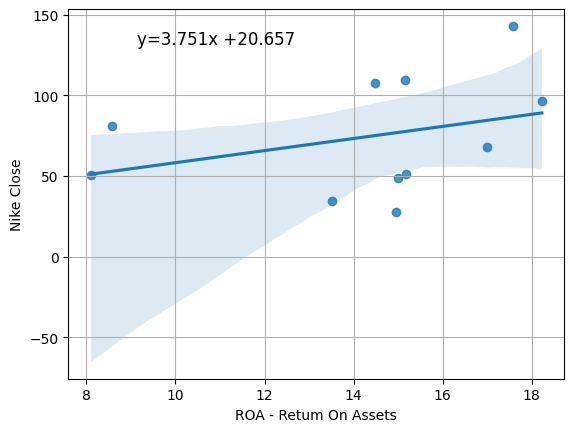

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.175
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.307
Time:                        22:57:01   Log-Likelihood:                -53.897
No. Observations:                  11   AIC:                             111.8
Df Residuals:                       9   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6574     50.799      0.407      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
rs = []
r2s = []
a_s = []
b_s = []
kfr_names = []

for k in nike_kfr:
  d_merged = pd.DataFrame({'Nike Close':stocks_nke.values,k:nike_kfr[k].values})
  sns.regplot(x=nike_kfr[k].values,y=stocks_nke.values)
  x = nike_kfr[k].values
  y = stocks_nke.values

  popt, _ = curve_fit(linreg,x,y,method="trf",maxfev=1000000,check_finite=True,p0=(0.1,0.1))

  a, b = popt
  a = np.round(a,3)
  b = np.round(b,3)

  pearson_r = np.round(np.corrcoef(x, y)[0,1], 2)
  r2 = np.round(r2_score(y,linreg(a,x,b)),2)
  text1 ="r = "+str(pearson_r) + " R2="+str(r2)
  print(popt,text1)

  rs.append(pearson_r)
  r2s.append(r2)
  a_s.append(a)
  b_s.append(b)
  kfr_names.append(k)

  if  b > 0 :
    plt.text(min(x)+np.std(x)/3,max(y)-np.std(y)/3, 'y=' + '{:.3f}'.format(a) + 'x +' + '{:.3f}'.format(b), size=12)
  else:
    plt.text(min(x)+np.std(x)/3,max(y)-np.std(y)/3, 'y=' + '{:.3f}'.format(a) + 'x ' + '{:.3f}'.format(b), size=12)

  title = 'y ='+ str(a) +'x'+ ' + '+str(b) + '\n' + text1
  #plt.title(title)
  plt.xlabel(k)
  plt.ylabel('Nike Close')
  plt.grid()

  plt.savefig('/content/results/plots/plots_nike/stocks vs '+k+'.png',dpi=1200)
  plt.show()

  #view model summary

  x = sm.add_constant(x)

  #fit linear regression model
  model = sm.OLS(y, x).fit()

  #view model summary
  print(model.summary())


  print("\n if ´P>|t|´ < 0.05  then  variable X has influence on Y. \
  \n In other words, it can be concluded that there is a statistically \
  \n significant relationship between stock value and ",k,"\n\n")
  print(" ´P>|t|´\n",model.pvalues)

  with open('/content/results/tables/summaries_nike/'+k+'summary'+'.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

In [ ]:
reg_corr_table = pd.DataFrame({'r':rs,'r2':r2s,'a':a_s,'b':b_s},index=kfr_names)
reg_corr_table.to_csv('/content/results/tables/summaries_nike/nike_reg_corr_table.csv')
reg_corr_table

,r,r2,a,b
Current Ratio,0.33,0.11,51.344,-58.467
Long-term Debt \ Capital,-0.83,0.69,-208.414,134.129
DebMEquity Ratio,-0.76,0.58,-84.413,114.980
Net Profit Margin,0.04,0.00,0.539,68.890
ROE - Return on Equity,-0.56,0.31,-2.479,158.161
ROA - Retum On Assets,0.34,0.12,3.751,20.657


In [ ]:
nike_kfr_anova = nike_kfr.copy()
nike_kfr_anova["stocks"] = stocks_nke.values
nike_kfr_anova.columns

,Current Ratio,Long-term Debt \ Capital,DebMEquity Ratio,Net Profit Margin,ROE - Return on Equity,ROA - Retum On Assets,stocks
Year,,,,,,,
2023,2.3961,0.3539,0.6174,11.0977,39.5010,14.9567,27.861175
2022,2.7228,0.3893,0.6379,9.8991,36.2039,13.5088,34.552431
2021,2.6294,0.3686,0.6171,12.9437,39.5655,14.9947,48.799044
2020,2.7177,0.4244,0.7374,12.8587,44.8578,15.1749,51.203512
2019,2.4814,0.5387,1.1989,6.7882,31.5208,8.1010,50.842587
2018,2.1008,0.2770,0.3848,10.2999,44.5686,16.9878,68.104408
2017,2.5056,0.2611,0.3883,5.3109,19.7004,8.5774,80.828491
2016,2.9341,0.2186,0.3064,12.3435,34.1733,18.2295,96.629257
2015,2.8042,0.1398,0.1663,11.6135,30.6739,17.5874,142.994095


In [ ]:
nike_kfr_anova.columns

Index(['Current Ratio', 'Long-term Debt \ Capital', 'DebMEquity Ratio',
       'Net Profit Margin', 'ROE - Return on Equity', 'ROA - Retum On Assets',
       'stocks'],
      dtype='object')

In [ ]:
# Y = XB^T+E
manova = MANOVA(endog=nike_kfr.values,
                exog=stocks_nke.values)
result = manova.mv_test()
print(result.summary())

                 Multivariate linear model
                                                            
------------------------------------------------------------
           x0            Value  Num DF Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda  0.0305 6.0000 5.0000 26.5201 0.0012
         Pillai's trace  0.9695 6.0000 5.0000 26.5201 0.0012
 Hotelling-Lawley trace 31.8241 6.0000 5.0000 26.5201 0.0012
    Roy's greatest root 31.8241 6.0000 5.0000 26.5201 0.0012



In [ ]:

x = sm.add_constant(nike_kfr)

y = stocks_nke.values
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


print("\n if ´P>|t|´ < 0.05  then  variable X has influence on Y. \
\n In other words, it can be concluded that there is a statistically \
\n significant relationship between stock value and \n\n")

with open('/content/results/tables/summaries_nike/nike_mlr_summary'+'.csv', 'w') as fh:
  fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3.210
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.139
Time:                        22:04:43   Log-Likelihood:                -44.890
No. Observations:                  11   AIC:                             103.8
Df Residuals:                       4   BIC:                             106.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


# lenovo

In [ ]:
lenovo_kfr = pd.read_csv('/content/kfr_lenovo_clean.csv',index_col=0)
lenovo_kfr

,Current Ratio,Long-term Debt \ Capital,DebMEquity Ratio,Net Profit Margin,ROE - Return on Equity,ROA - Retum On Assets
Year,,,,,,
2023,0.8706,0.3699,0.5952,1.7771,18.1266,2.84460
2022,0.8792,0.3785,0.6540,2.5953,27.7960,4.31870
2021,0.8852,0.3280,0.6342,2.8342,39.7674,4.81980
2020,0.8525,0.4775,1.3526,1.9398,36.3658,3.45610
2019,0.8055,0.2782,1.5565,1.3114,19.8188,2.50400
2018,0.8241,0.3720,1.3797,1.1684,16.0409,2.19150
2017,0.8049,0.3681,1.0157,-0.4175,27.8870,0.04449
2016,0.8110,0.4201,0.9456,1.2434,12.9527,1.95120
2015,0.8228,0.4529,1.1518,-0.2853,20.2500,-0.57980


In [ ]:
# sns.histplot(lenovo_kfr,element="poly")
# plt.grid()
# plt.show()
# sns.histplot(lenovo_kfr[['Current Ratio', 'Long-term Debt \ Capital', 'DebMEquity Ratio',
#        'Net Profit Margin', 'ROA - Retum On Assets']],element="poly")
# plt.grid()
# plt.show()

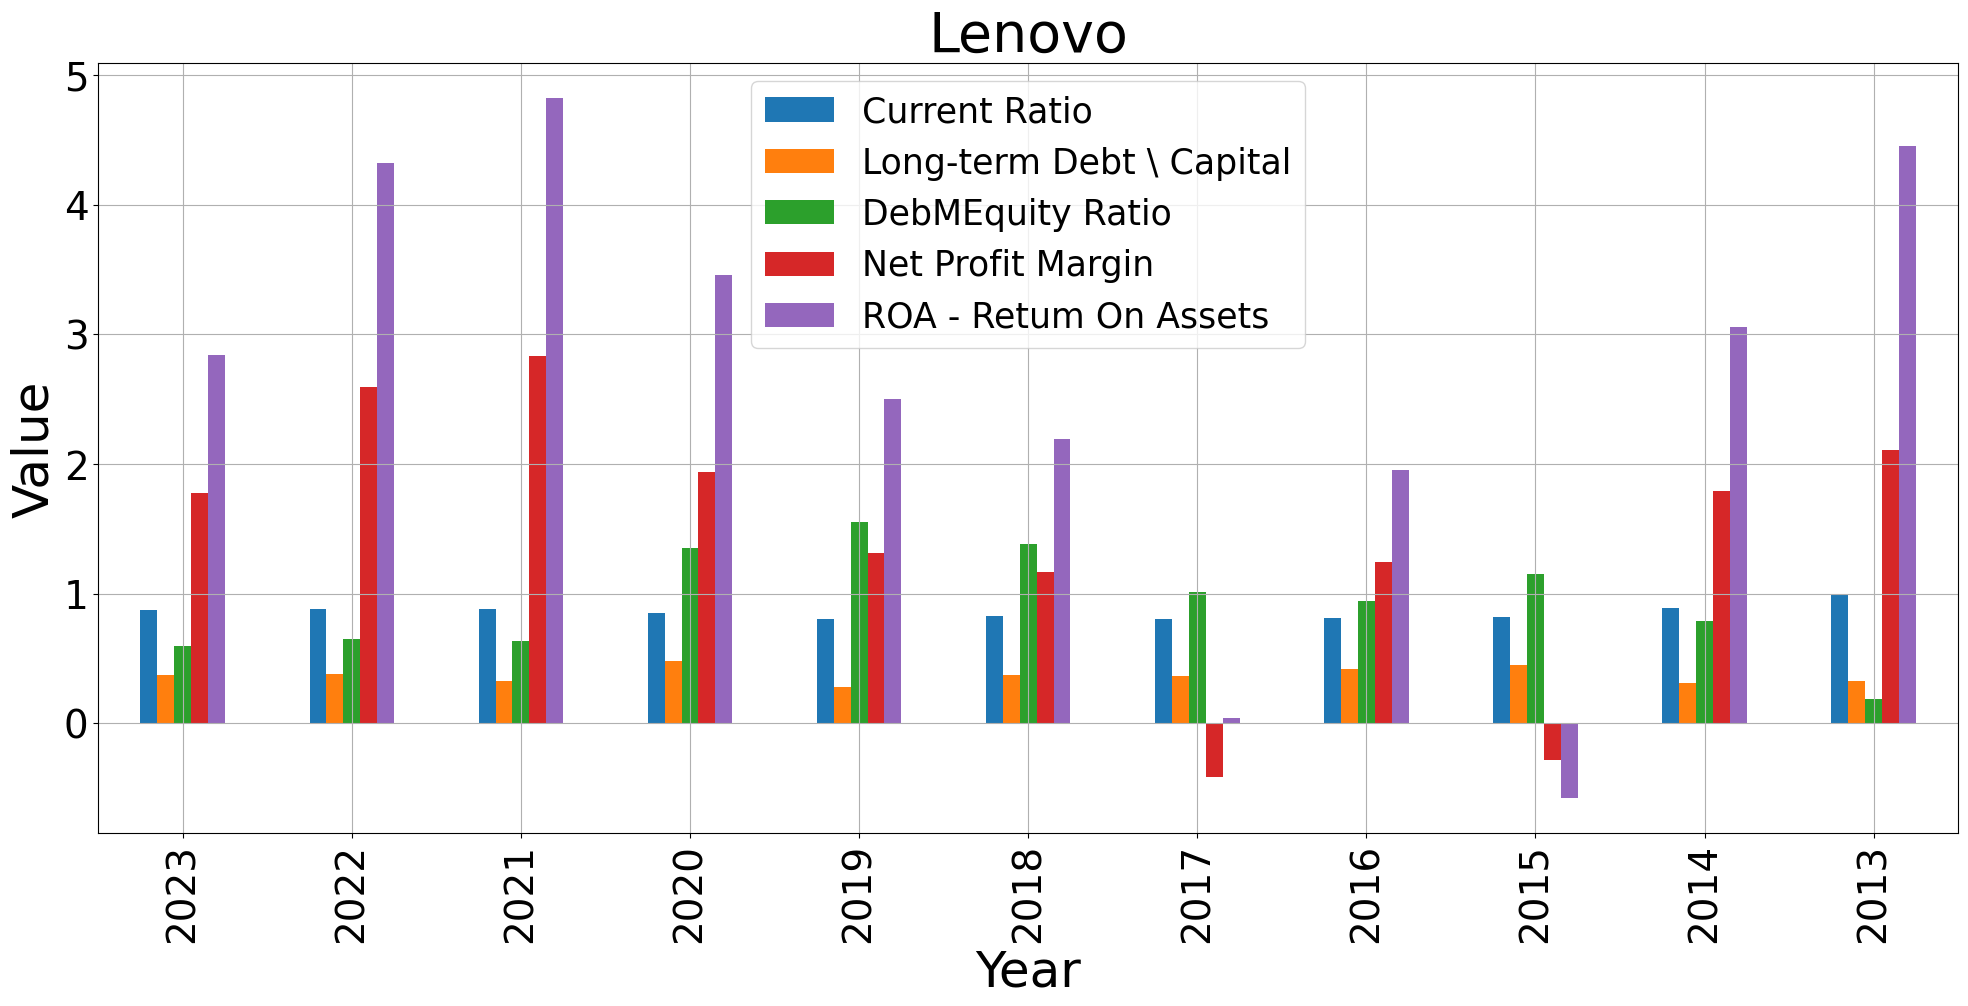

In [ ]:
lenovo_kfr[['Current Ratio', 'Long-term Debt \ Capital', 'DebMEquity Ratio',
       'Net Profit Margin', 'ROA - Retum On Assets']].plot(kind="bar",grid=True,figsize=(24,10))
plt.title('Lenovo',size=20*2)
plt.ylabel('Value',size=18*2)
plt.xlabel('Year',size=18*2)
plt.xticks(size=14*2)
plt.yticks(size=14*2)
plt.legend(fontsize=25)
plt.savefig('/content/results/plots/plots_lenovo/lenovo_barplot.png',dpi=1500)
plt.show()

<Axes: xlabel='Year'>

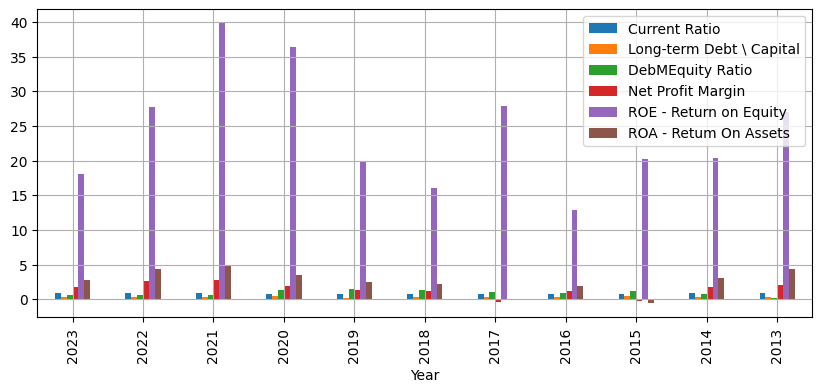

In [ ]:
lenovo_kfr.plot(kind="bar",grid=True,figsize=(10,4))

In [ ]:
for k in lenovo_kfr:
#perform Shapiro-Wilk test
  print(k,np.round(shapiro(lenovo_kfr[k]),5))
#p-val>0.05 ->normal

Current Ratio [0.84027 0.03184]
Long-term Debt \ Capital [0.95995 0.77103]
DebMEquity Ratio [0.97105 0.89696]
Net Profit Margin [0.90545 0.21521]
ROE - Return on Equity [0.92886 0.39943]
ROA - Retum On Assets [0.9297  0.40784]


[ 49.00021051 -28.39748666] r = 0.63 R2=0.4


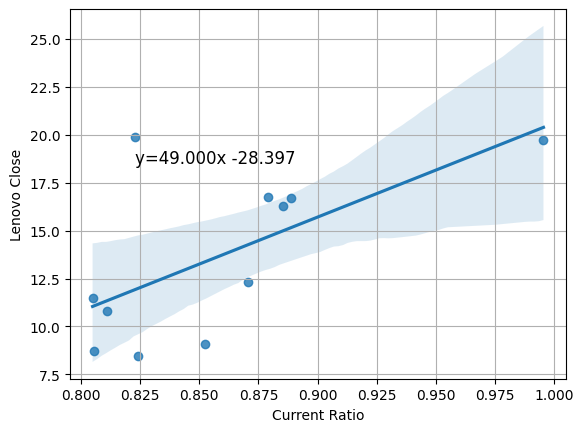

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     6.008
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0367
Time:                        22:05:24   Log-Likelihood:                -28.412
No. Observations:                  11   AIC:                             60.82
Df Residuals:                       9   BIC:                             61.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.3975     17.188     -1.652      0.1

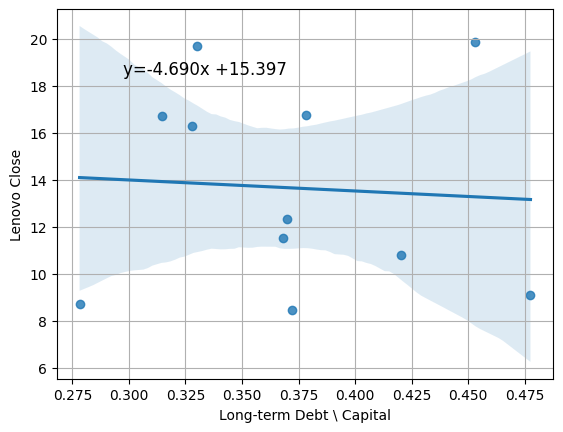

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                   0.03786
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.850
Time:                        22:05:30   Log-Likelihood:                -31.202
No. Observations:                  11   AIC:                             66.40
Df Residuals:                       9   BIC:                             67.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3969      9.067      1.698      0.1

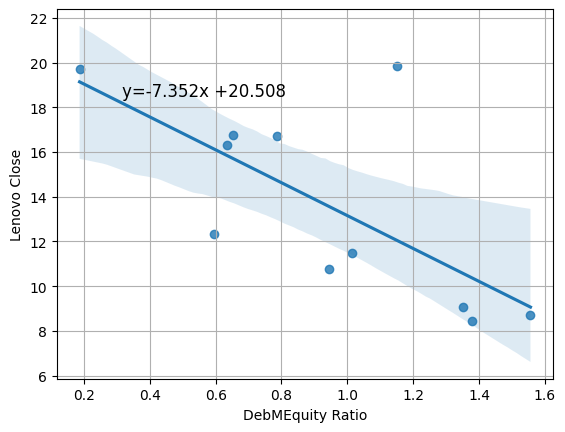

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     8.388
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0177
Time:                        22:05:34   Log-Likelihood:                -27.603
No. Observations:                  11   AIC:                             59.21
Df Residuals:                       9   BIC:                             60.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5084      2.566      7.991      0.0

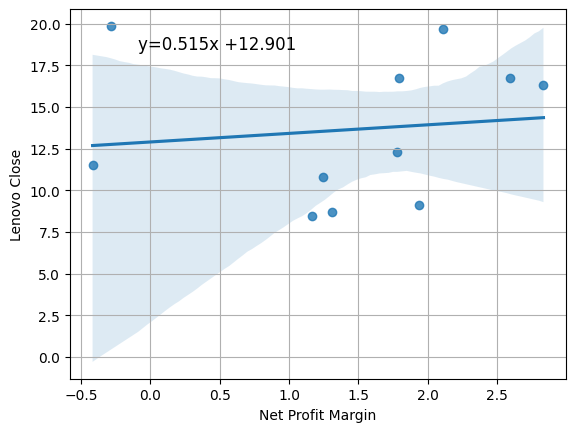

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.094
Method:                 Least Squares   F-statistic:                    0.1388
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.718
Time:                        22:05:38   Log-Likelihood:                -31.141
No. Observations:                  11   AIC:                             66.28
Df Residuals:                       9   BIC:                             67.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9006      2.440      5.288      0.0

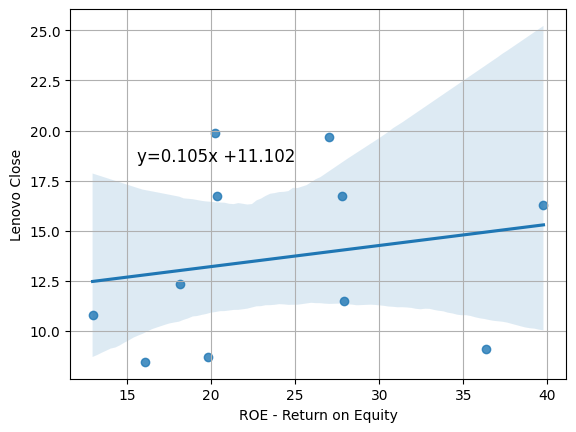

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.3900
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.548
Time:                        22:05:42   Log-Likelihood:                -30.992
No. Observations:                  11   AIC:                             65.98
Df Residuals:                       9   BIC:                             66.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1018      4.302      2.580      0.0

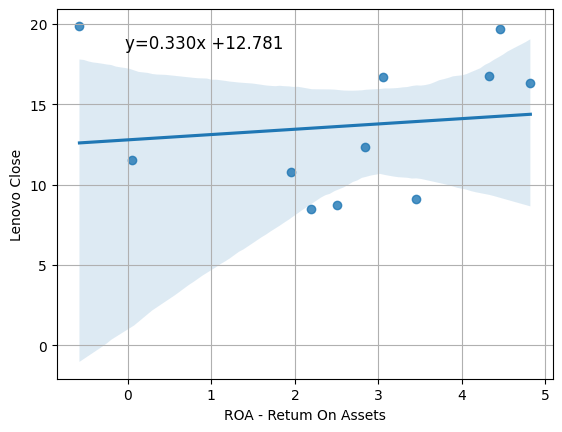

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.1565
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.702
Time:                        22:05:46   Log-Likelihood:                -31.130
No. Observations:                  11   AIC:                             66.26
Df Residuals:                       9   BIC:                             67.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7814      2.593      4.929      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
rs = []
r2s = []
a_s = []
b_s = []
kfr_names = []

for k in lenovo_kfr:
  d_merged = pd.DataFrame({'LENOVO Close':stocks_lnv.values,k:lenovo_kfr[k].values})
  sns.regplot(x=lenovo_kfr[k].values,y=stocks_lnv.values)
  x = lenovo_kfr[k].values
  y = stocks_lnv.values

  popt, _ = curve_fit(linreg,x,y,method="trf",maxfev=1000000,check_finite=True,p0=(0.1,0.1))

  a, b = popt
  a = np.round(a,3)
  b = np.round(b,3)

  pearson_r = np.round(np.corrcoef(x, y)[0,1], 2)
  r2 = np.round(r2_score(y,linreg(a,x,b)),2)
  text1 ="r = "+str(pearson_r) + " R2="+str(r2)
  print(popt,text1)

  rs.append(pearson_r)
  r2s.append(r2)
  a_s.append(a)
  b_s.append(b)
  kfr_names.append(k)

  title = 'y ='+ str(a) +'x'+ ' + '+str(b) + '\n' + text1


  #plt.text(min(x)+np.std(x)/3,max(y)-np.std(y)/3, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)
  if  b > 0 :
    plt.text(min(x)+np.std(x)/3,max(y)-np.std(y)/3, 'y=' + '{:.3f}'.format(a) + 'x +' + '{:.3f}'.format(b), size=12)
  else:
    plt.text(min(x)+np.std(x)/3,max(y)-np.std(y)/3, 'y=' + '{:.3f}'.format(a) + 'x ' + '{:.3f}'.format(b), size=12)

  #plt.title(title)
  plt.xlabel(k)
  plt.ylabel('Lenovo Close')
  plt.grid()
  plt.savefig('/content/results/plots/plots_lenovo/stocks vs '+k+'.png',dpi=1200)
  plt.show()



  #view model summary

  x = sm.add_constant(x)

  #fit linear regression model
  model = sm.OLS(y, x).fit()

  #view model summary
  print(model.summary())


  print("\n if ´P>|t|´ < 0.05  then  variable X has influence on Y. \
  \n In other words, it can be concluded that there is a statistically \
  \n significant relationship between stock value and ",k,"\n\n")
  print(" ´P>|t|´\n",model.pvalues)

  with open('/content/results/tables/summaries_lenovo/'+k+'summary'+'.csv', 'w') as fh:
    fh.write(model.summary().as_csv())


In [ ]:
reg_corr_table = pd.DataFrame({'r':rs,'r2':r2s,'a':a_s,'b':b_s},index=kfr_names)
reg_corr_table.to_csv('/content/results/tables/summaries_lenovo/lenovo_reg_corr_table.csv')
reg_corr_table

,r,r2,a,b
Current Ratio,0.63,0.40,49.000,-28.397
Long-term Debt \ Capital,-0.06,0.00,-4.690,15.397
DebMEquity Ratio,-0.69,0.48,-7.352,20.508
Net Profit Margin,0.12,0.02,0.515,12.901
ROE - Return on Equity,0.20,0.04,0.105,11.102
ROA - Retum On Assets,0.13,0.02,0.330,12.781


In [ ]:
x = sm.add_constant(lenovo_kfr)
y = stocks_lnv.values
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


print("\n if ´P>|t|´ < 0.05  then  variable X has influence on Y. \
\n In other words, it can be concluded that there is a statistically \
\n significant relationship between stock value and \n\n")

with open('/content/results/tables/summaries_lenovo/lenovo_mlr_summary'+'.csv', 'w') as fh:
  fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3.760
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.110
Time:                        22:05:46   Log-Likelihood:                -20.813
No. Observations:                  11   AIC:                             55.63
Df Residuals:                       4   BIC:                             58.41
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


# test means

In [ ]:
t_stat = []
p_values = []
col_names = []

# Perform two-sample t-test
for k in nike_kfr:

  t_statistic, p_value = ttest_ind(nike_kfr[k], lenovo_kfr[k], alternative='greater')

  # Output the results
  print(k)
  print(f"t-statistic: {t_statistic}")
  print(f"P-value: {p_value}\n")
  t_stat.append(t_statistic)
  p_values.append(p_value)
  col_names.append(k)

# if p-value is less than our defined value of 0.05,
# we can say that the mean1 is higher with statistical significance.
pd.DataFrame({'t-stat':t_stat,'p-value':p_values},index=col_names).to_csv('/content/results/tables/t_test_results.csv')

Current Ratio
t-statistic: 24.22354880844636
P-value: 1.353820893301755e-16

Long-term Debt \ Capital
t-statistic: -1.8101502821171922
P-value: 0.957337457799091

DebMEquity Ratio
t-statistic: -2.8661890056348898
P-value: 0.9952264784823127

Net Profit Margin
t-statistic: 11.2081740781923
P-value: 2.248801640422007e-10

ROE - Return on Equity
t-statistic: 2.7025767172686304
P-value: 0.006850253181812618

ROA - Retum On Assets
t-statistic: 10.474879436072177
P-value: 7.209774776223391e-10



In [ ]:
!zip -r /content/results.zip /content/results
# #files.download("/content/results.zip")

  adding: content/results/ (stored 0%)
  adding: content/results/plots/ (stored 0%)
  adding: content/results/plots/plots_nike/ (stored 0%)
  adding: content/results/plots/plots_nike/nike_barplot.png (deflated 66%)
  adding: content/results/plots/plots_nike/stocks vs ROA - Retum On Assets.png (deflated 37%)
  adding: content/results/plots/plots_nike/.ipynb_checkpoints/ (stored 0%)
  adding: content/results/plots/plots_nike/stocks vs Current Ratio.png (deflated 34%)
  adding: content/results/plots/plots_nike/stocks vs DebMEquity Ratio.png (deflated 33%)
  adding: content/results/plots/plots_nike/stocks vs Long-term Debt \ Capital.png (deflated 30%)
  adding: content/results/plots/plots_nike/stocks vs Net Profit Margin.png (deflated 36%)
  adding: content/results/plots/plots_nike/stocks vs ROE - Return on Equity.png (deflated 32%)
  adding: content/results/plots/plots_lenovo/ (stored 0%)
  adding: content/results/plots/plots_lenovo/stocks vs ROA - Retum On Assets.png (deflated 37%)
  add

# two-sample t-test

In [ ]:
# Perform two-sample t-test
for k in nike_kfr:

  t_statistic, p_value = ttest_ind(nike_kfr[k], lenovo_kfr[k], alternative='greater')

  # Output the results
  print(k)
  print(f"t-statistic: {t_statistic}")
  print(f"P-value: {p_value}\n")

# if p-value is less than our defined value of 0.05,
# we can say that the mean1 is higher with statistical significance.

Current Ratio
t-statistic: 24.22354880844636
P-value: 1.353820893301755e-16

Long-term Debt \ Capital
t-statistic: -1.8101502821171922
P-value: 0.957337457799091

DebMEquity Ratio
t-statistic: -2.8661890056348898
P-value: 0.9952264784823127

Net Profit Margin
t-statistic: 11.2081740781923
P-value: 2.248801640422007e-10

ROE - Return on Equity
t-statistic: 2.7025767172686304
P-value: 0.006850253181812618

ROA - Retum On Assets
t-statistic: 10.474879436072177
P-value: 7.209774776223391e-10

